In [2]:
#student data loading
import pandas as py
import warnings
warnings.filterwarnings('ignore')
student_data=py.read_csv("stud.csv")
print(student_data)

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none          72             72         

In [3]:
student_data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# checking the missing values
student_data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# checking the duplicates
student_data.duplicated().sum()

0

In [6]:
df=student_data.drop_duplicates()# if duplicates present then use this method to drop  those
student_data=df

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# finding the types present in each coloumns
student_data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [14]:
# exploring the data
print ("gender")
print(student_data['gender'].unique())
print ("race_ethnicity")
print(student_data['race_ethnicity'].unique())
print ("parental_level_of_education")
print(student_data['parental_level_of_education'].unique())
print ("lunch")
print(student_data['lunch'].unique())
print ("test_preparation_course")

print(student_data['test_preparation_course'].unique())

gender
['female' 'male']
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test_preparation_course
['none' 'completed']


In [15]:
# finding the numerical and categorical columns
numerical_columns=[feature for feature in student_data.columns if student_data[feature].dtype!='O']# check wheather the feature is objective type or not
categorical_columns=[feature for feature in student_data.columns if student_data[feature].dtype=='O']
print("numerical_columns",numerical_columns)
print("categorical_columns",categorical_columns)

numerical_columns ['math_score', 'reading_score', 'writing_score']
categorical_columns ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
# adding extra columns like total_score and average_score to student_data
student_data['total_score']=student_data['math_score']+student_data['reading_score']+student_data['writing_score']
student_data['average_score']=student_data['total_score']/3
student_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
# find the number of students who score full marks in each subject
reading_full=student_data[student_data['reading_score']==100]['average_score'].count()
writing_full=student_data[student_data['writing_score']==100]['average_score'].count()
math_full=student_data[student_data['math_score']==100]['average_score'].count()
print("number of studnet who got full marks in maths" ,math_full)
print("number of studnet who got full marks in reading" ,reading_full)
print("number of studnet who got full marks in writing" ,writing_full)

number of studnet who got full marks in maths 7
number of studnet who got full marks in reading 17
number of studnet who got full marks in writing 14


In [19]:
reading_marks=student_data[student_data['reading_score']==100].count()
print(reading_marks)

gender                         17
race_ethnicity                 17
parental_level_of_education    17
lunch                          17
test_preparation_course        17
math_score                     17
reading_score                  17
writing_score                  17
total_score                    17
average_score                  17
dtype: int64


In [20]:
# find the number of studnets who have scores less than the 20 marks
reading_full=student_data[student_data['reading_score']<=20]['average_score'].count()
writing_full=student_data[student_data['writing_score']<=20]['average_score'].count()
math_full=student_data[student_data['math_score']<=20]['average_score'].count()
print("number of studnet who got full marks in maths" ,math_full)
print("number of studnet who got full marks in reading" ,reading_full)
print("number of studnet who got full marks in writing" ,writing_full)

number of studnet who got full marks in maths 4
number of studnet who got full marks in reading 1
number of studnet who got full marks in writing 3


In [21]:
# find the students who have total is less than 100
less_total=student_data[student_data['total_score']<100]['average_score'].count()
print(less_total)

15


<Axes: xlabel='average_score', ylabel='Count'>

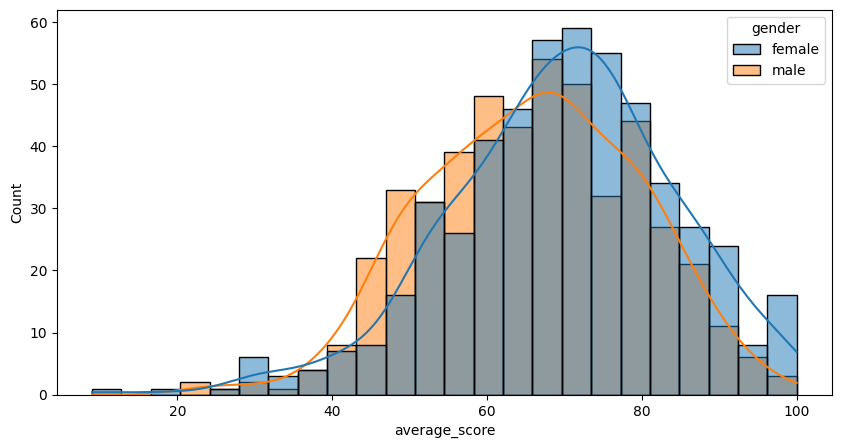

In [23]:
# data visualizations plots
import matplotlib.pyplot as plt
import seaborn as sns
# histogram ploting for average on the gender basis with help of KDE
plt.figure(figsize=(10,5))
sns.histplot(data=student_data,x='average_score',hue='gender',kde=True)


<Axes: xlabel='average_score', ylabel='Count'>

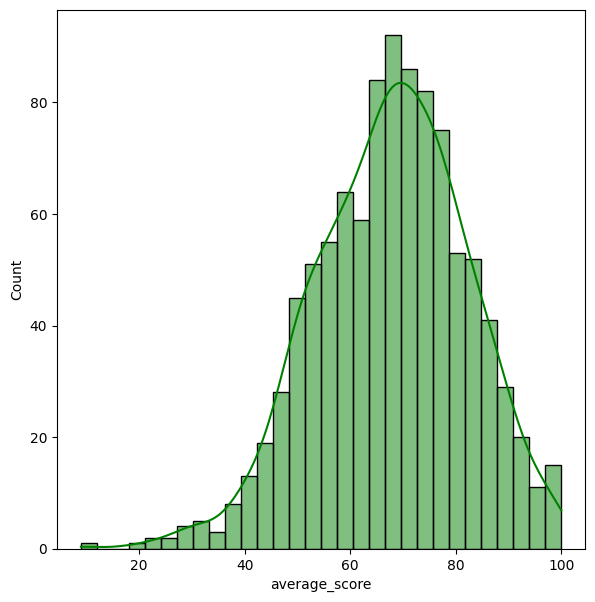

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')

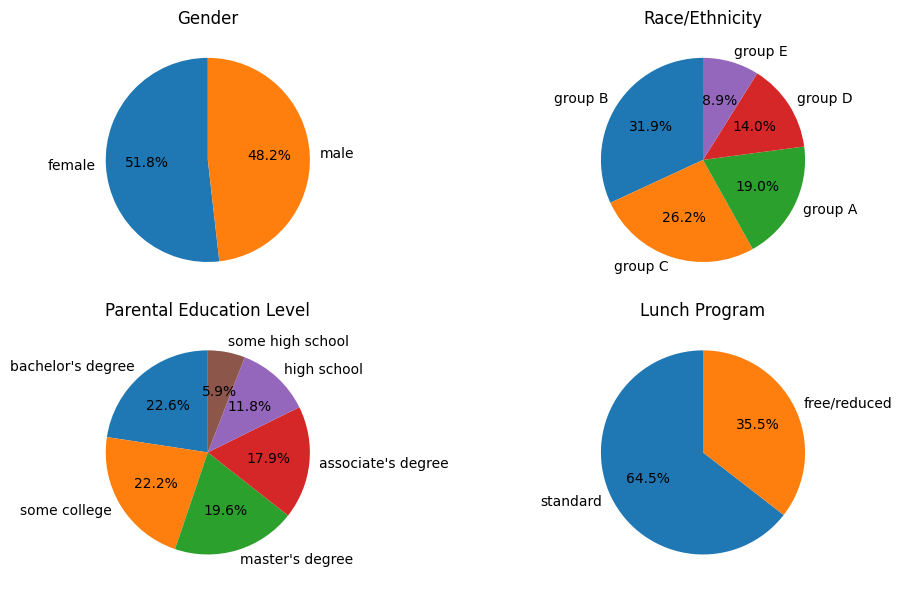

In [31]:
# ploting the piecharts
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Adjust figsize for better visualization

# Plot pie charts on each subplot with horizontal orientation
axes[0, 0].pie(student_data['gender'].value_counts(), labels=student_data['gender'].unique(), autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender')

axes[0, 1].pie(student_data['race_ethnicity'].value_counts(), labels=student_data['race_ethnicity'].unique(), autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Race/Ethnicity')

axes[1, 0].pie(student_data['parental_level_of_education'].value_counts(), labels=student_data['parental_level_of_education'].unique(), autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Parental Education Level')

axes[1, 1].pie(student_data['lunch'].value_counts(), labels=student_data['lunch'].unique(), autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Lunch Program')

fig.tight_layout()
plt.show()


<Axes: xlabel='average_score', ylabel='Count'>

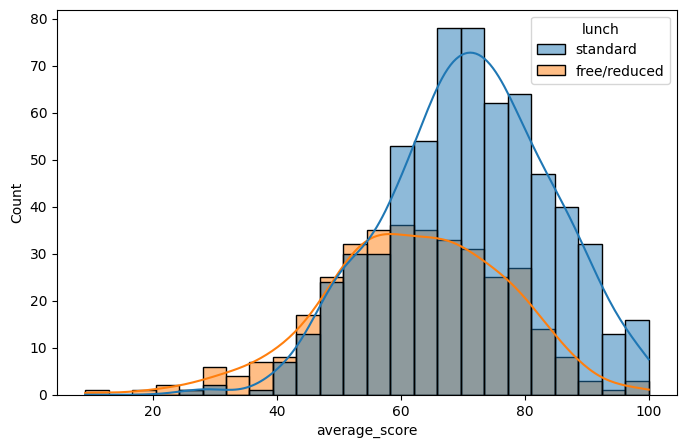

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# histogram ploting for average on the gender basis with help of KDE
plt.figure(figsize=(8,5))
sns.histplot(data=student_data,x='average_score',hue='lunch',kde=True)

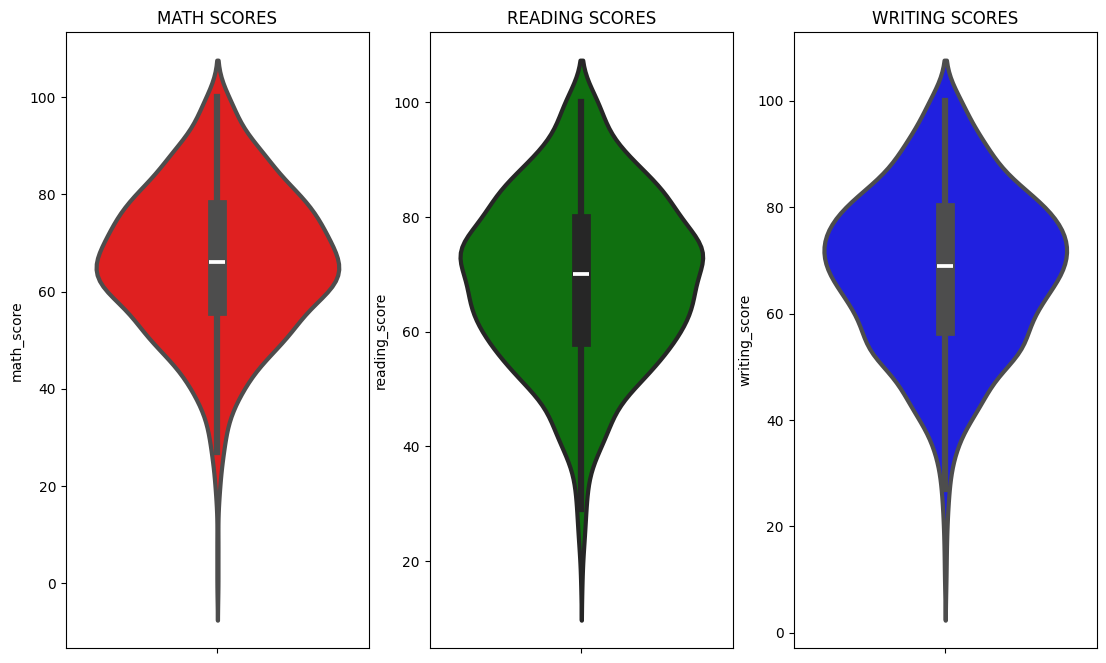

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

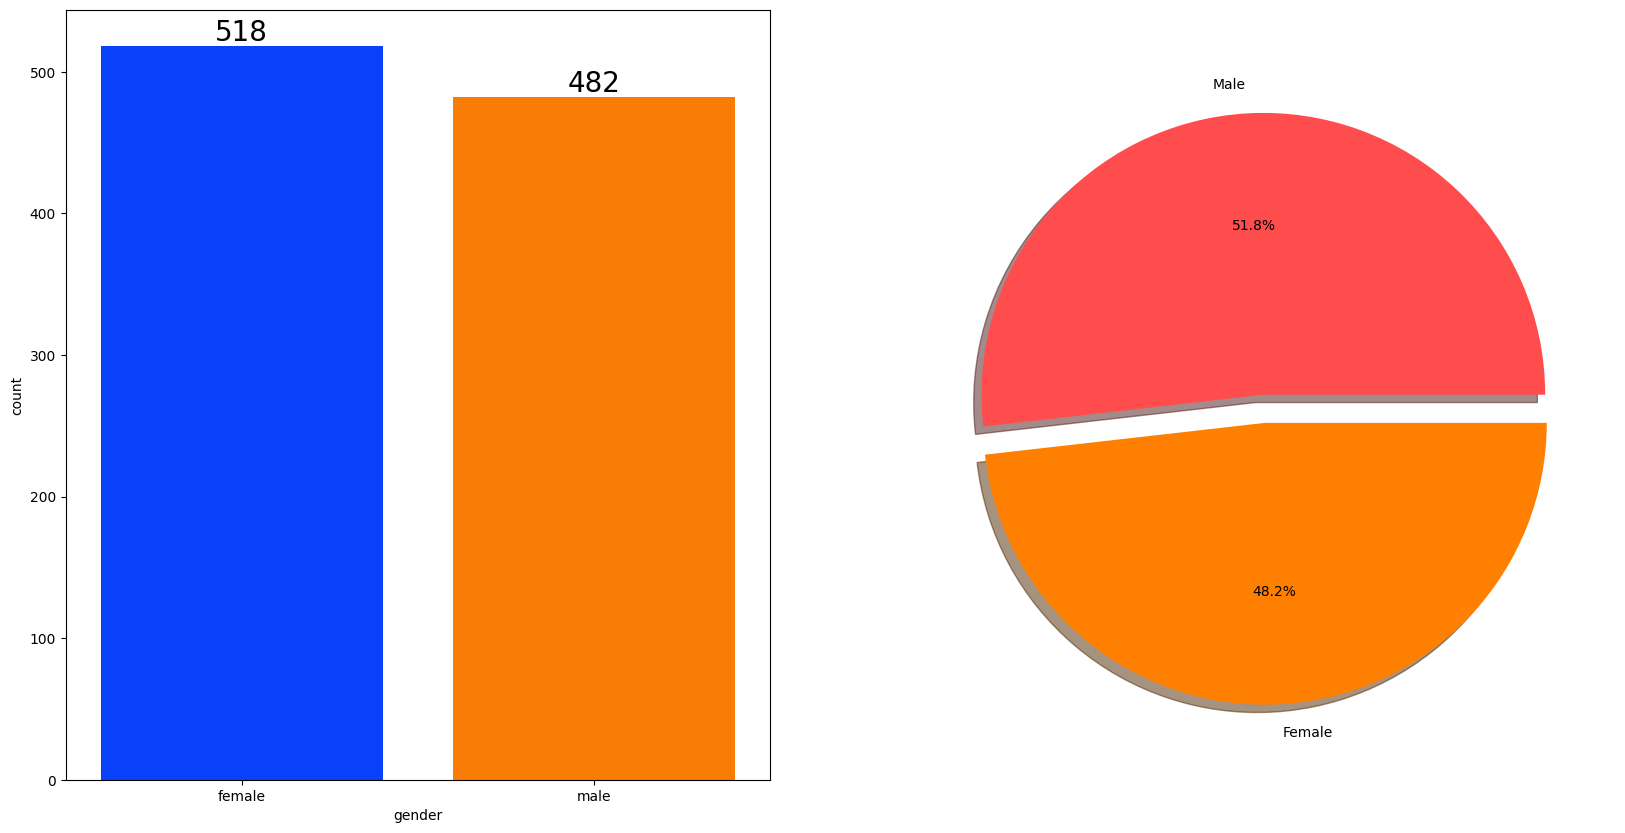

In [36]:

sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

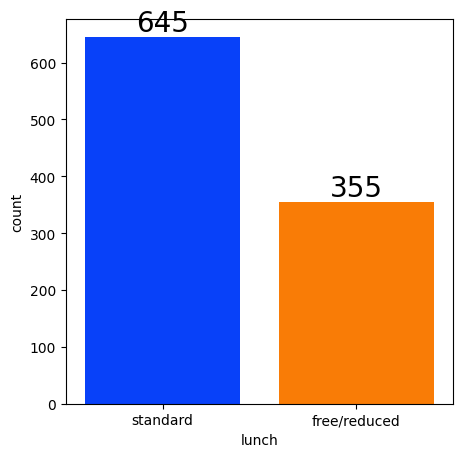

In [47]:
# apply for rest of  categotical columns
# Bargrphs for lunch

f, ax = plt.subplots(1, 1, figsize=(5, 5))  # f is the figure, ax is the single Axes object
sns.countplot(x=df['lunch'], data=df, palette='bright', ax=ax, saturation=0.95)  # Use ax directly
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)
plt.show()


In [49]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
